In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 3.6 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [4]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [5]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        initial_state = env.reset()
        state = initial_state[0] if isinstance(initial_state, tuple) else initial_state
        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            result = env.step(action)
            next_state, reward, done, extra_bool, info = result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state

            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] + learning_rate * (
                reward + gamma * q_table[next_state, next_action] - q_table[state, action]
            )

            reward_episode += reward
            state = next_state
            action = next_action

            if done:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all


In [6]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [12]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

#FrozenLake-v1

In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [ ]:
start_time_qlearning = time.time()
q_table_qlearning_FLv1, rewards_all_qlearning_FLv1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_qlearning = time.time()
execution_time_qlearning_FLv1 = end_time_qlearning - start_time_qlearning

Episode 19999 finished


In [ ]:
start_time_sarsa = time.time()
q_table_sarsa_FLv1, rewards_all_sarsa_FLv1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_sarsa = time.time()
execution_time_sarsa_Flv1 = end_time_sarsa - start_time_sarsa

Episode 19999 finished


In [ ]:
print("Q-Learning ")
play_multiple_times(env, q_table_qlearning_FLv1, 1000)
print(f"Execution time:  {execution_time_qlearning_FLv1} seconds")
print("SARSA")
play_multiple_times(env, q_table_sarsa_FLv1, 1000)
print(f"Execution time: {execution_time_sarsa_Flv1} seconds")

Q-Learning 
Number of successes: 743/1000
Average number of steps: 36.850605652759086
Execution time:  35.480748653411865 seconds
SARSA
Number of successes: 726/1000
Average number of steps: 37.46556473829201
Execution time: 15.52503490447998 seconds


Text(0.5, 1.0, 'H1 - FrozenLake-v1')

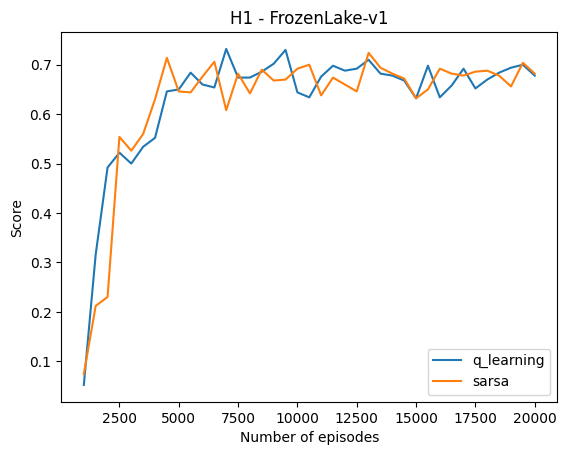

In [ ]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(500,20000,500):
  score_history1.append((np.sum(rewards_all_qlearning_FLv1[i-500:i])/500))
  score_history2.append((np.sum(rewards_all_sarsa_FLv1[i-500:i])/500))
# plt.plot(list(range(0, 20000)), rewards_all6)
plt.plot(list(range(500, 20000+1, 500))[1:], score_history1,label='q_learning')
plt.plot(list(range(500, 20000+1, 500))[1:], score_history2,label='sarsa')
# plt.axis([0,2000,-400, 100])
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.title("H1 - FrozenLake-v1")

#FrozenLake8x8-v1

In [56]:
# Hyperparameters
gamma = 0.99
initial_learning_rate = 0.1
min_learning_rate = 0.01
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0001

num_episodes = 20000
num_steps_per_episode = 400

In [57]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

In [58]:
start_time_qlearning = time.time()
q_table_qlearning_FL8x8v1, rewards_all_qlearning_FL8x8v1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_qlearning = time.time()
execution_time_qlearning_FL8x8v1 = end_time_qlearning - start_time_qlearning

Episode 19999 finished


In [61]:
start_time_sarsa = time.time()
q_table_sarsa_FL8x8v1, rewards_all_sarsa_FL8x8v1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_sarsa = time.time()
execution_time_sarsa_FL8x8v1 = end_time_sarsa - start_time_sarsa

Episode 19999 finished


In [62]:
print("Q-Learning ")
play_multiple_times(env, q_table_qlearning_FL8x8v1, 1000)
print(f"Execution time:  {execution_time_qlearning_FL8x8v1} seconds")
print("SARSA")
play_multiple_times(env, q_table_sarsa_FL8x8v1, 1000)
print(f"Execution time: {execution_time_sarsa_FL8x8v1} seconds")

Q-Learning 
Number of successes: 775/1000
Average number of steps: 89.75096774193548
Execution time:  38.02264928817749 seconds
SARSA
Number of successes: 736/1000
Average number of steps: 97.66576086956522
Execution time: 24.100603103637695 seconds


Text(0.5, 1.0, 'H2-FrozenLake8x8-v1')

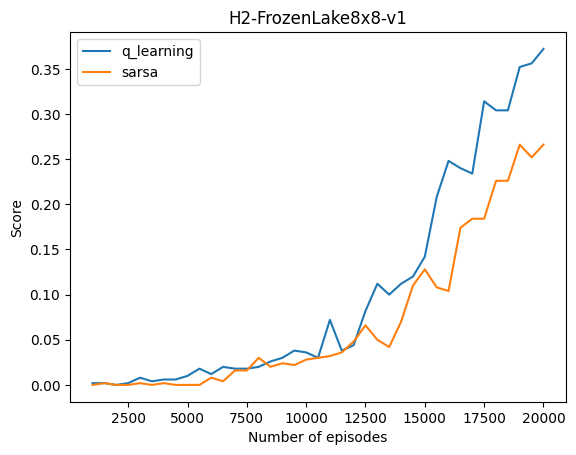

In [63]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(500,20000,500):
  score_history1.append((np.sum(rewards_all_qlearning_FL8x8v1[i-500:i])/500))
  score_history2.append((np.sum(rewards_all_sarsa_FL8x8v1[i-500:i])/500))
# plt.plot(list(range(0, 20000)), rewards_all6)
plt.plot(list(range(500, 20000+1, 500))[1:], score_history1,label='q_learning')
plt.plot(list(range(500, 20000+1, 500))[1:], score_history2,label='sarsa')
# plt.axis([0,2000,-400, 100])
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.title("H2-FrozenLake8x8-v1")

#Taxi-v3

In [70]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 10000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [71]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [72]:
start_time_qlearning = time.time()
q_table_qlearning_Tv3, rewards_all_qlearning_Tv3 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_qlearning = time.time()
execution_time_qlearning_Tv3 = end_time_qlearning - start_time_qlearning

Episode 9999 finished


In [73]:
start_time_sarsa = time.time()
q_table_sarsa_Tv3, rewards_all_sarsa_Tv3 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time_sarsa = time.time()
execution_time_sarsa_Tv3 = end_time_sarsa - start_time_sarsa

Episode 9999 finished


In [74]:
print("Q-Learning ")
play_multiple_times(env, q_table_qlearning_Tv3, 1000)
print(f"Execution time:  {execution_time_qlearning_Tv3} seconds")
print("SARSA")
play_multiple_times(env, q_table_sarsa_Tv3, 1000)
print(f"Execution time: {execution_time_sarsa_Tv3} seconds")

Q-Learning 
Number of successes: 1000/1000
Average number of steps: 12.991
Execution time:  9.30050778388977 seconds
SARSA
Number of successes: 1000/1000
Average number of steps: 13.168
Execution time: 7.008825302124023 seconds


Text(0.5, 1.0, 'H2-FrozenLake8x8-v1')

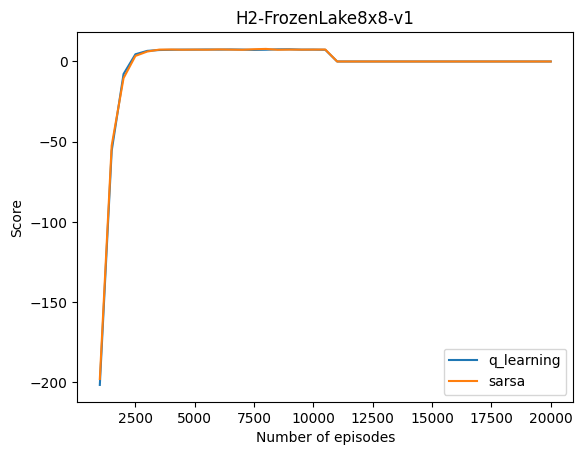

In [76]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(500,20000,500):
  score_history1.append((np.sum(rewards_all_qlearning_Tv3[i-500:i])/500))
  score_history2.append((np.sum(rewards_all_sarsa_Tv3[i-500:i])/500))
# plt.plot(list(range(0, 20000)), rewards_all6)
plt.plot(list(range(500, 20000+1, 500))[1:], score_history1,label='q_learning')
plt.plot(list(range(500, 20000+1, 500))[1:], score_history2,label='sarsa')
# plt.axis([0,2000,-400, 100])
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.title("H2-FrozenLake8x8-v1")

# Sumary

Nhận xét từ thực nghiệm:
*   FrozenLake-v1: Cả Q-Learning và SARSA đều hoạt động tốt do không gian trạng thái nhỏ. SARSA hội tụ nhanh hơn và thực thi nhanh hơn.
*   FrozenLake8x8-v1: Q-Learning thường vượt trội hơn SARSA do khả năng khám phá và khai thác hiệu quả hơn trong không gian trạng thái lớn. Cả hai thuật toán cần nhiều thời gian hơn để hội tụ, nhưng Q-Learning thường có tỷ lệ thành công cao hơn và số bước trung bình thấp hơn.
*   Taxi-v3: Cả hai thuật toán hoạt động tốt, với Q-Learning hội tụ nhanh hơn do tính chất off-policy. SARSA hoạt động tương đương nhưng có thể mất nhiều thời gian hơn để đạt được hiệu suất tối ưu.

Tóm lại:
* Q-Learning thường hoạt động tốt hơn trong các môi trường có không gian trạng thái lớn hoặc chuyển đổi xác định do tính chất off-policy, cho phép hội tụ nhanh hơn và khai thác các chính sách đã học một cách tối ưu hơn.
* SARSA hoạt động tốt trong các môi trường nhỏ hoặc xác định hơn nhưng có thể gặp khó khăn với không gian trạng thái lớn do tính chất on-policy, dẫn đến hội tụ chậm hơn và khám phá ít hiệu quả hơn.